In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [41]:
data = pd.read_csv("./input/books.csv", on_bad_lines='skip')
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


Columns Description:

* **bookID** Contains the unique ID for each book/series
* **title** contains the titles of the books
* **authors** contains the author of the particular book
* **average_rating** the average rating of the books, as decided by the users
* **ISBN** ISBN(10) number, tells the information about a book - such as edition and publisher
* **ISBN 13** The new format for ISBN, implemented in 2007. 13 digits
* **language_code** Tells the language for the books
* **Num_pages** Contains the number of pages for the book
* **Ratings_count** Contains the number of ratings given for the book
* **text_reviews_count** Has the count of reviews left by users

In [42]:
data.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

# Goodreads Books Analysis

## Top 20 Top Rated Books

In [43]:
top_books = data[data['ratings_count'] > 1000000]
top_books = top_books.sort_values(by='average_rating', ascending=False).head(20)
# top_books

/tmp/ipykernel_398348/693375834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="average_rating", y="title", data=top_books, palette=color)
/tmp/ipykernel_398348/693375834.py:5: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x="average_rating", y="title", data=top_books, palette=color)


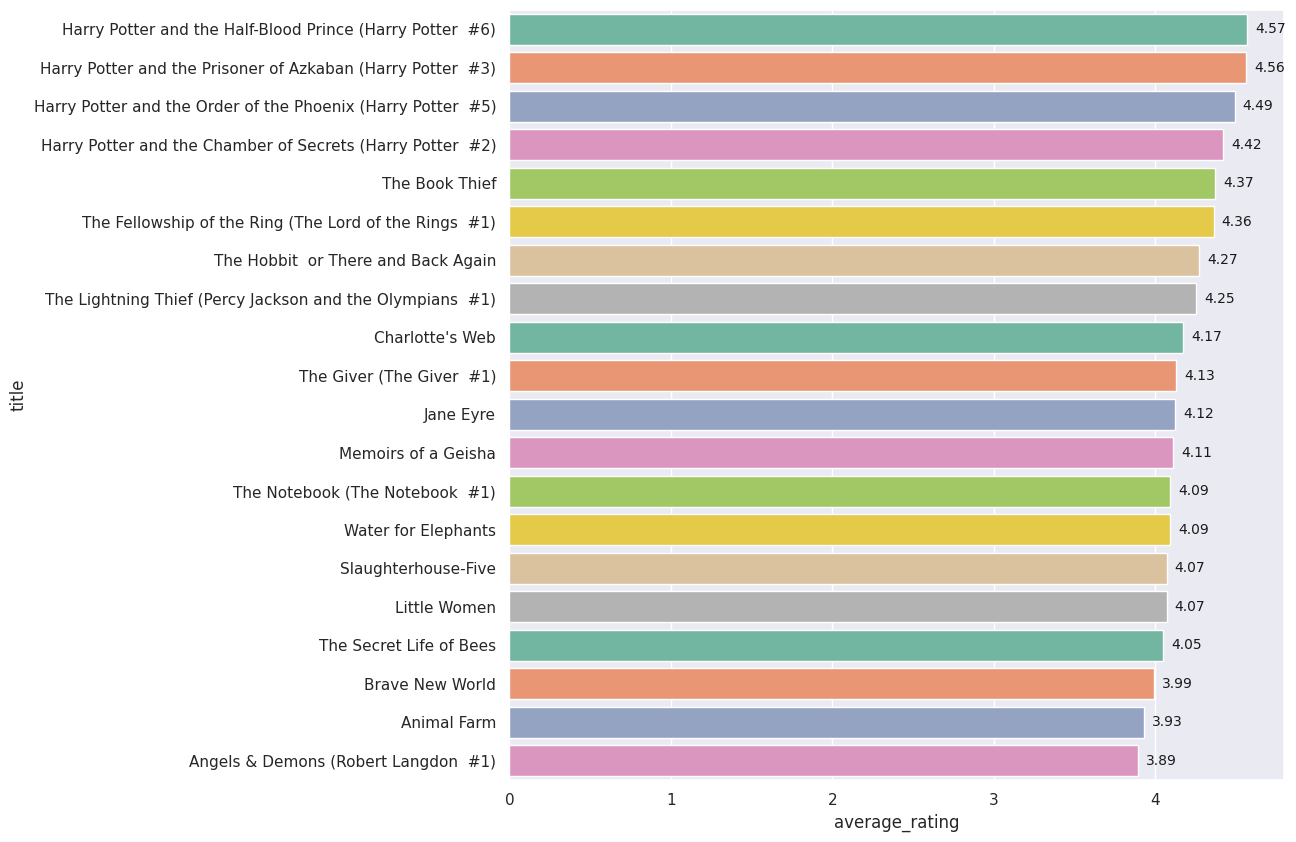

In [44]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="average_rating", y="title", data=top_books, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

## Top 20 Top Voted Books

In [45]:
top_vote = data.sort_values(by='ratings_count', ascending=False).head(20)

/tmp/ipykernel_398348/3905178680.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="ratings_count", y="title", data=top_vote, palette=color)
/tmp/ipykernel_398348/3905178680.py:5: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x="ratings_count", y="title", data=top_vote, palette=color)


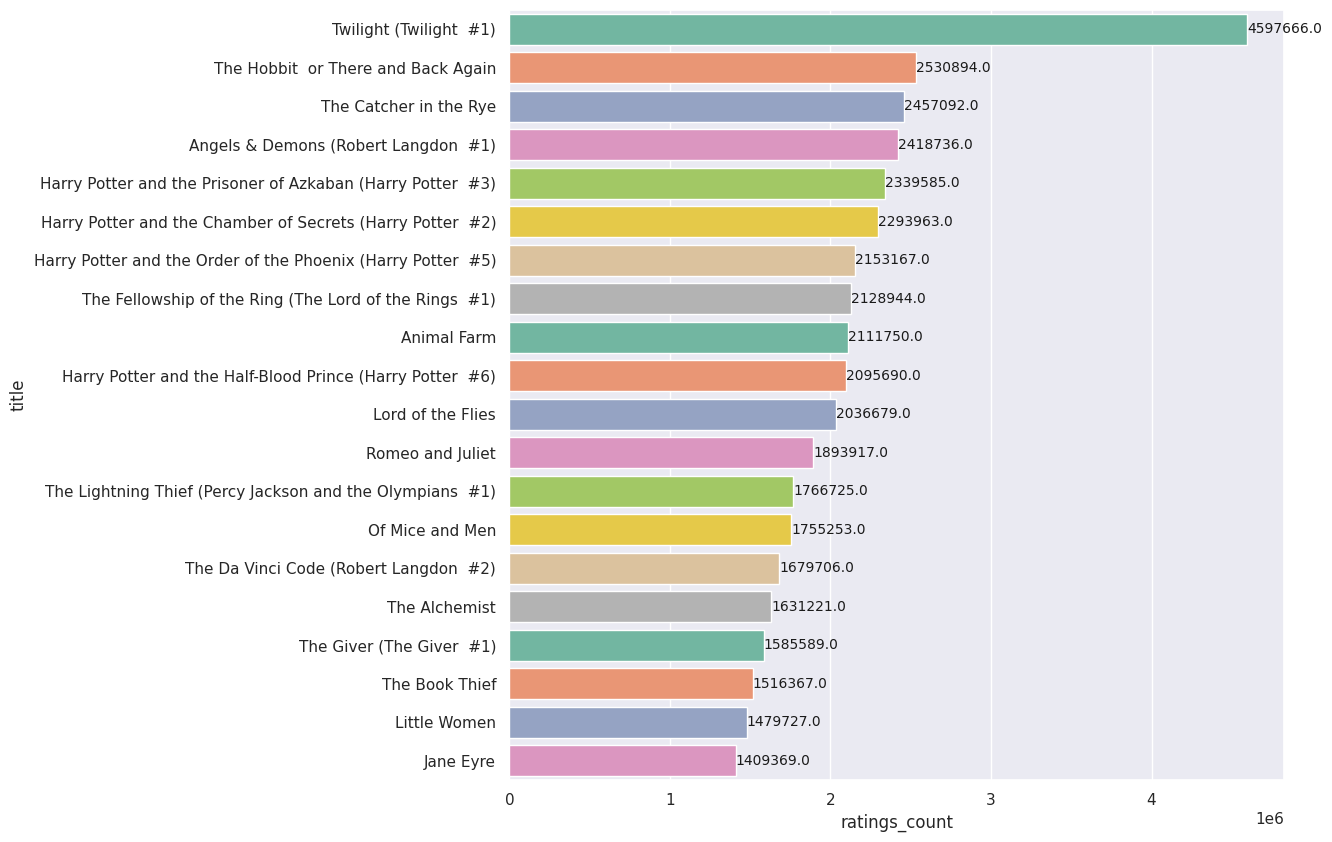

In [46]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="ratings_count", y="title", data=top_vote, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

## Top rated but not in top voted

In [47]:
list(set(top_books['title'].values) - set(top_vote['title'].values))

['Brave New World',
 "Charlotte's Web",
 'Slaughterhouse-Five',
 'Memoirs of a Geisha',
 'The Notebook (The Notebook  #1)',
 'The Secret Life of Bees',
 'Water for Elephants']

## Top voted but not in top rated

In [48]:
list(set(top_vote['title'].values) - set(top_books['title'].values))

['Romeo and Juliet',
 'The Catcher in the Rye',
 'The Da Vinci Code (Robert Langdon  #2)',
 'Lord of the Flies',
 'Twilight (Twilight  #1)',
 'The Alchemist',
 'Of Mice and Men']

## Relationship between rating and vote

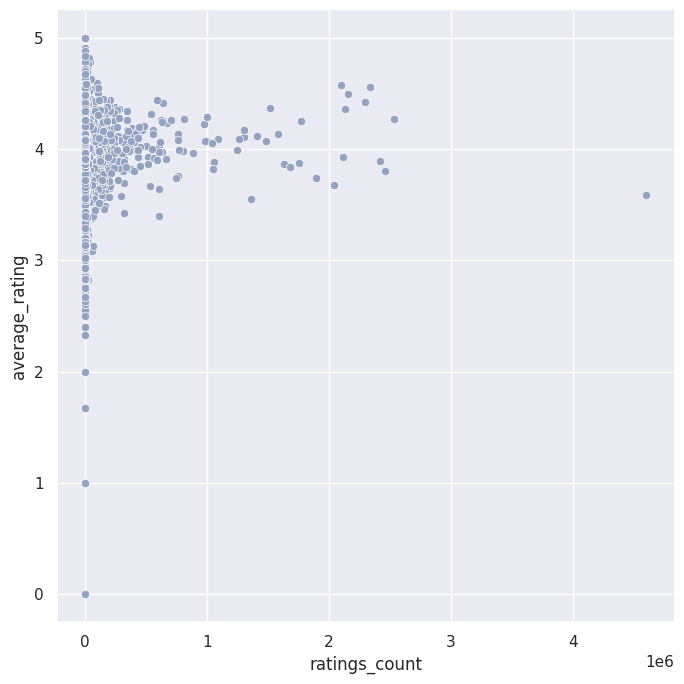

In [49]:
ax = sns.relplot(data=data, x="ratings_count", y="average_rating", color = '#95a3c3', sizes=(100, 200), height=7, marker='o')

In [50]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [51]:
new_data = data.copy()

In [52]:
def fun_only_author(text):
    arlen = text.split('/')
    return arlen[0]

In [53]:
new_data['only_author'] = new_data['authors'].apply(lambda x : fun_only_author(x))

In [54]:
total_rating = new_data.drop_duplicates(subset=['only_author', 'title'], keep='first')
total_rating = total_rating.groupby(by=['only_author']).agg({'average_rating': ['sum']})
total_rating.columns = ['total_rating']
total_rating.reset_index(inplace=True)
total_rating = total_rating.sort_values(by=['total_rating'], ascending=False)
total_rating

,only_author,total_rating
3753,Stephen King,250.79
3006,P.G. Wodehouse,187.31
4161,William Shakespeare,178.45
1603,J.R.R. Tolkien,172.22
3536,Rumiko Takahashi,163.28
...,...,...
146,Andrew Hunt,0.00
1654,James Craig Holte,0.00
1751,Jasmine C.M. Luk,0.00
935,Dobrica Erić,0.00


In [55]:
total_book = new_data.groupby(by=['only_author']).agg({'title': ['nunique']})
total_book.columns = ['total_book']
total_book.reset_index(inplace=True)
total_book = total_book.sort_values(by=['total_book'], ascending=False)
total_book

,only_author,total_book
3753,Stephen King,63
4161,William Shakespeare,45
3006,P.G. Wodehouse,45
29,Agatha Christie,41
1603,J.R.R. Tolkien,41
...,...,...
1727,Jane Parker Resnick,1
1729,Jane Robins,1
1731,Jane Walmsley,1
1732,Jane Werner Watson,1


In [56]:
avg_author = pd.merge(total_book, total_rating, on='only_author', how='outer')
avg_author['average_rating'] = round(avg_author['total_rating'] / avg_author['total_book'], 2)
avg_author = avg_author[avg_author['total_book'] > 26]
avg_author = avg_author.sort_values(by=['average_rating'], ascending=False)
avg_author

,only_author,total_book,total_rating,average_rating
1603,J.R.R. Tolkien,41,172.22,4.20
3536,Rumiko Takahashi,39,163.28,4.19
476,C.S. Lewis,32,134.02,4.19
3006,P.G. Wodehouse,45,187.31,4.16
3907,Terry Pratchett,31,127.55,4.11
3365,Roald Dahl,35,141.66,4.05
2729,Mercedes Lackey,40,160.11,4.00
2607,Mark Twain,27,107.68,3.99
3753,Stephen King,63,250.79,3.98
4161,William Shakespeare,45,178.45,3.97


## Weighted Rating calculation

<img src="https://miro.medium.com/max/736/1*fGziZl2Do-VyQXSCPq_Y2Q.png" />

In [57]:
total_vote = new_data.drop_duplicates(subset=['only_author', 'title'], keep='first')
total_vote.reset_index(inplace=True)
total_vote = total_vote[['only_author', 'title', 'average_rating', 'ratings_count']]
total_vote

,only_author,title,average_rating,ratings_count
0,J.K. Rowling,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690
1,J.K. Rowling,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167
2,J.K. Rowling,Harry Potter and the Chamber of Secrets (Harry...,4.42,6333
3,J.K. Rowling,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585
4,J.K. Rowling,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428
...,...,...,...,...
10416,William T. Vollmann,Expelled from Eden: A William T. Vollmann Reader,4.06,156
10417,William T. Vollmann,You Bright and Risen Angels,4.08,783
10418,William T. Vollmann,The Ice-Shirt (Seven Dreams #1),3.96,820
10419,William T. Vollmann,Poor People,3.72,769


In [58]:
C = total_vote.average_rating.mean()
C

3.933244410325305

In [59]:
m = total_vote.ratings_count.quantile(0.9)
m

24967.0

In [60]:
total_vote = total_vote[total_vote['ratings_count'] >= m]
total_vote.head()

,only_author,title,average_rating,ratings_count
0,J.K. Rowling,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690
1,J.K. Rowling,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167
3,J.K. Rowling,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585
4,J.K. Rowling,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428
6,J.K. Rowling,Harry Potter Collection (Harry Potter #1-6),4.73,28242


In [61]:
def weighted_rating(x, m=m, C=C):
    v = x['ratings_count']
    R = x['average_rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [62]:
total_vote['score'] = total_vote.apply(weighted_rating, axis=1)

/tmp/ipykernel_398348/3611905562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_vote['score'] = total_vote.apply(weighted_rating, axis=1)


In [63]:
total_vote = total_vote.sort_values(by='score', ascending=False).head(20)
total_vote

,only_author,title,average_rating,ratings_count,score
0,J.K. Rowling,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690,4.562503
3,J.K. Rowling,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585,4.553382
1,J.K. Rowling,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167,4.483618
4,J.K. Rowling,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428,4.461588
20,J.R.R. Tolkien,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,4.59,101233,4.460070
3955,Art Spiegelman,The Complete Maus,4.55,111475,4.437142
6137,Bill Watterson,The Complete Calvin and Hobbes,4.82,32213,4.432808
3965,J.R.R. Tolkien,The Two Towers (The Lord of the Rings #2),4.44,593467,4.419542
269,Hiromu Arakawa,Fullmetal Alchemist Vol. 1 (Fullmetal Alchemi...,4.50,111091,4.395999
6138,Bill Watterson,The Calvin and Hobbes Tenth Anniversary Book,4.63,49122,4.395203


/tmp/ipykernel_398348/930545329.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="score", y="title", data=total_vote, palette=color)
/tmp/ipykernel_398348/930545329.py:5: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x="score", y="title", data=total_vote, palette=color)


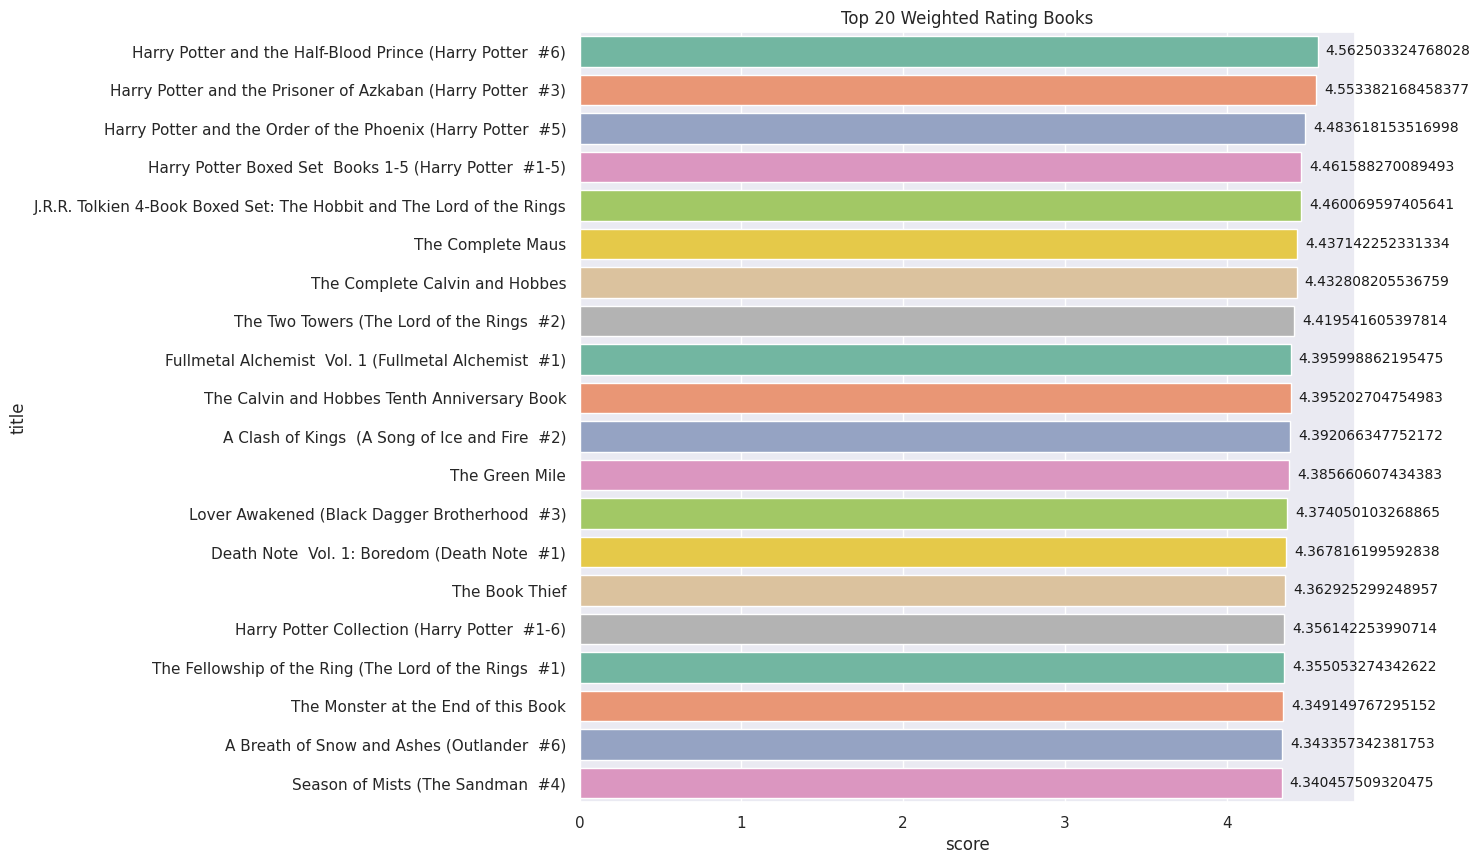

In [64]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="score", y="title", data=total_vote, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.title("Top 20 Weighted Rating Books")
plt.show()

## most books of an author

/tmp/ipykernel_398348/1937883150.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="total_book", y="only_author", data=avg_author, palette=color)
/tmp/ipykernel_398348/1937883150.py:5: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x="total_book", y="only_author", data=avg_author, palette=color)


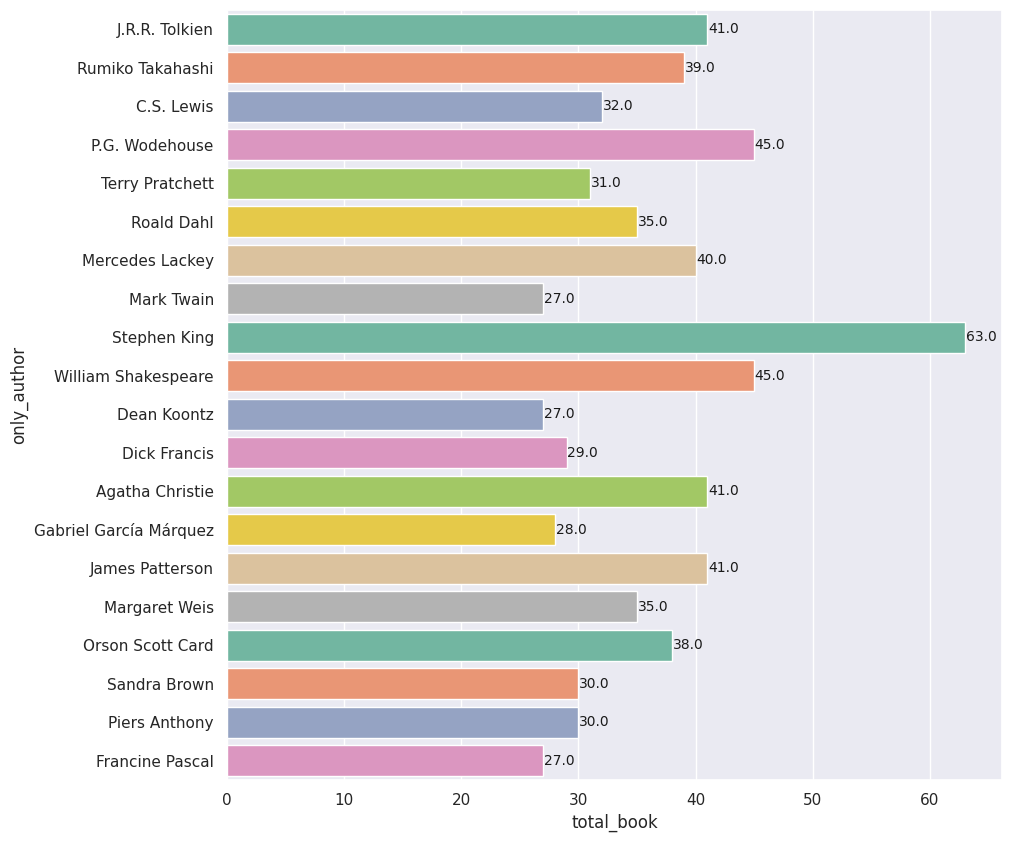

In [65]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="total_book", y="only_author", data=avg_author, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

## average rating of an author

/tmp/ipykernel_398348/745485554.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="average_rating", y="only_author", data=avg_author, palette=color)
/tmp/ipykernel_398348/745485554.py:5: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x="average_rating", y="only_author", data=avg_author, palette=color)


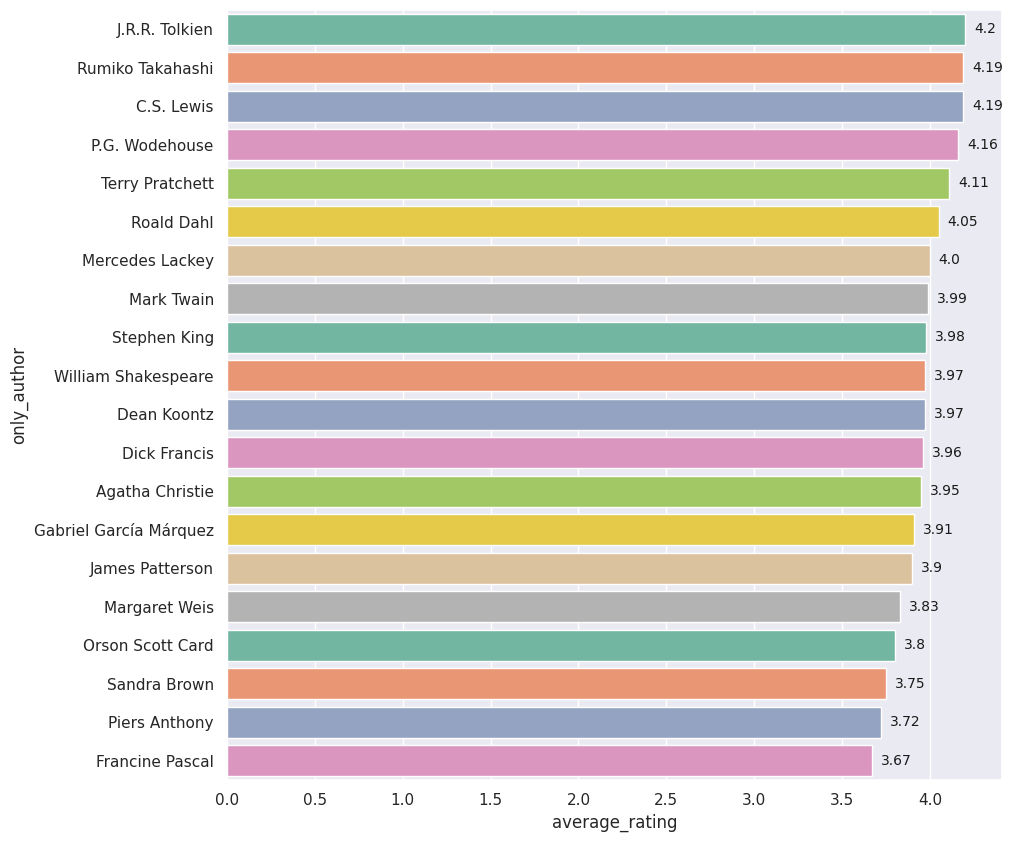

In [66]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="average_rating", y="only_author", data=avg_author, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

## Language Distribution

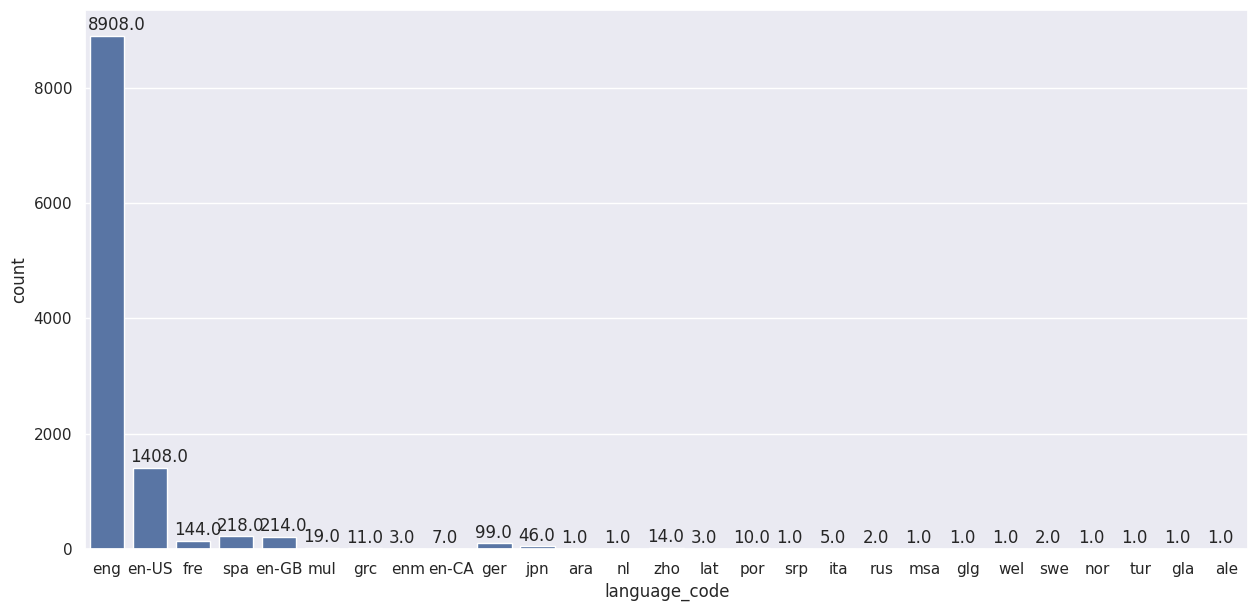

In [67]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x=data.language_code, data=data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.05, p.get_height()+100))

## Top 20 Top Voted Books

In [68]:
top_pages = data.sort_values(by='  num_pages', ascending=False).head(20)

/tmp/ipykernel_398348/3158462076.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="  num_pages", y="title", data=top_pages, palette=color)
/tmp/ipykernel_398348/3158462076.py:5: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x="  num_pages", y="title", data=top_pages, palette=color)


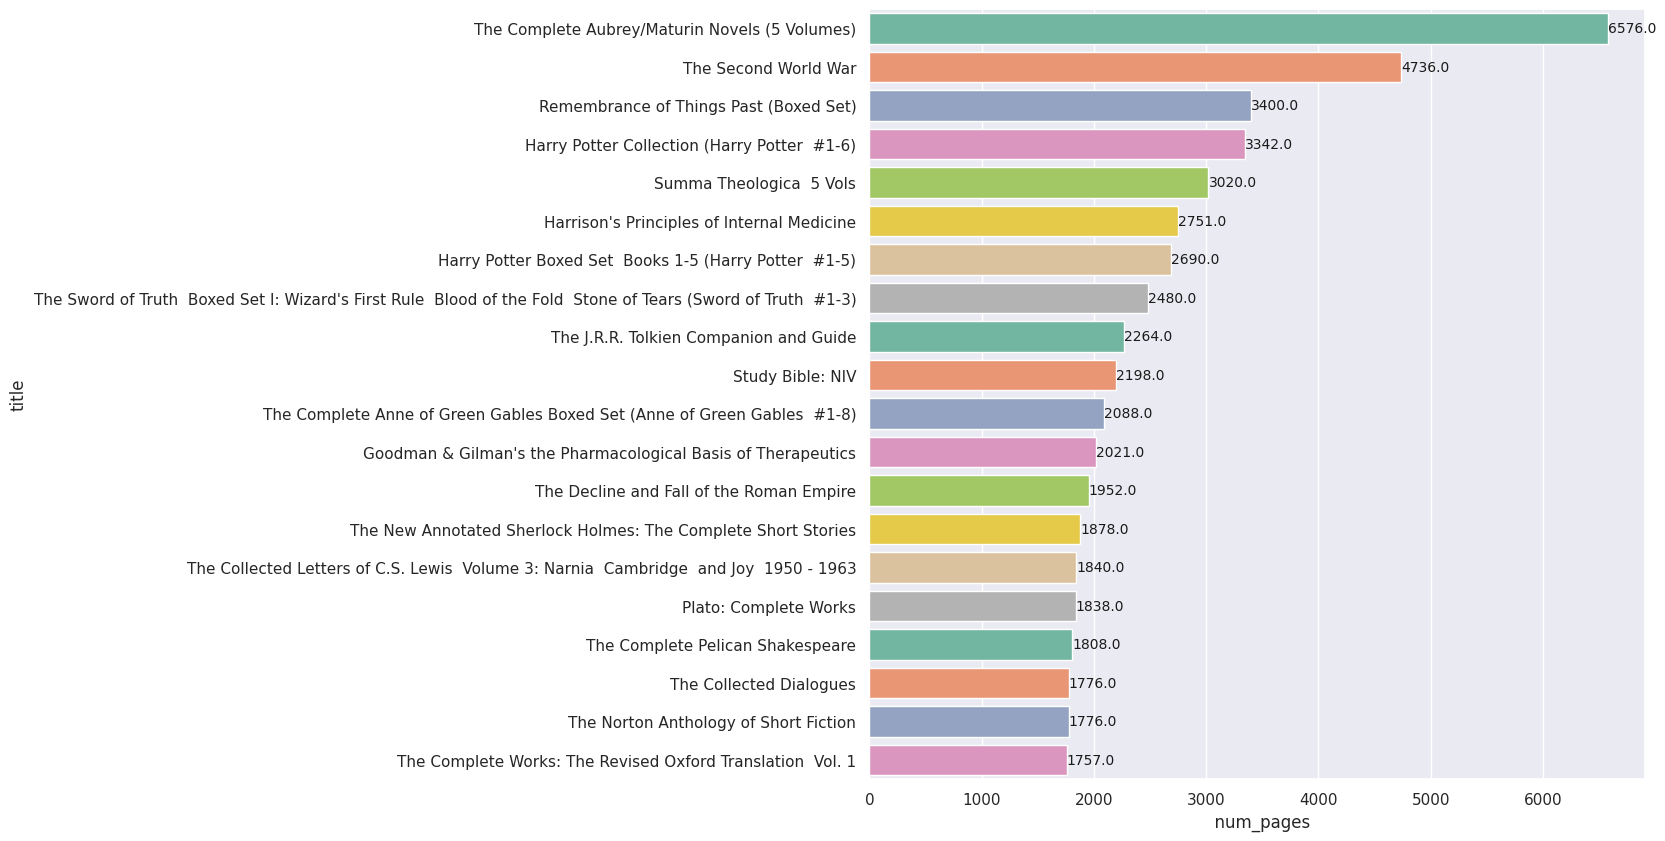

In [69]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x="  num_pages", y="title", data=top_pages, palette=color)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

## Relationship between rating and pages

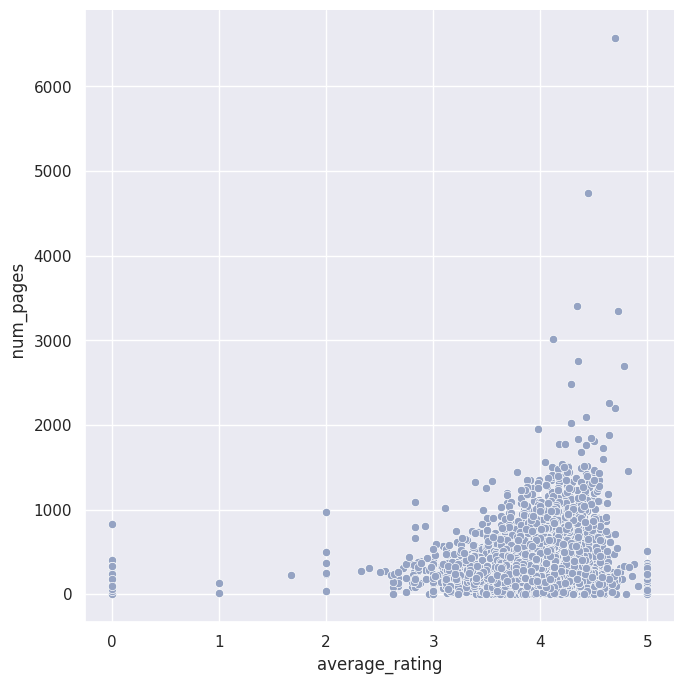

In [70]:
ax = sns.relplot(data=data, x="average_rating", y="  num_pages", color = '#95a3c3', sizes=(100, 200), height=7, marker='o')

## Relationship between pages and ratings_count

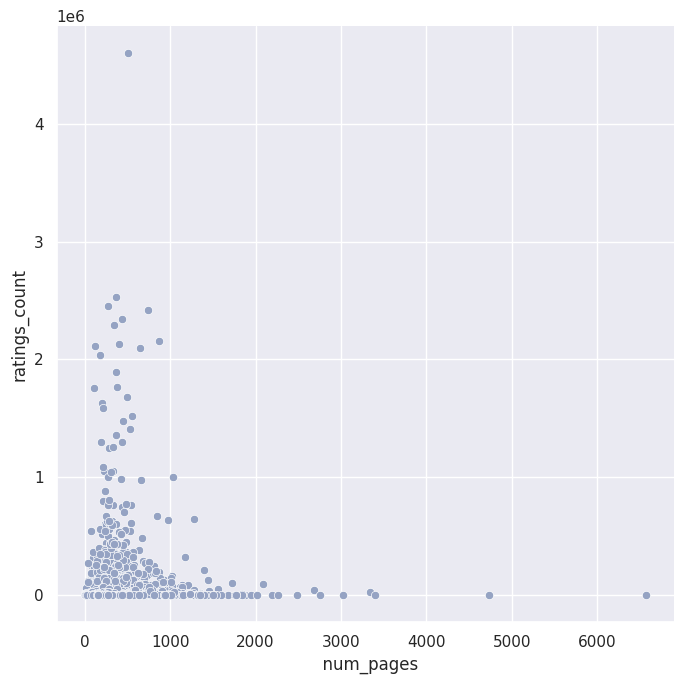

In [71]:
ax = sns.relplot(data=data, x="  num_pages", y="ratings_count", color = '#95a3c3', sizes=(100, 200), height=7, marker='o')

## Data cloud of All title

In [72]:
title_value = data.title.unique()

In [73]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

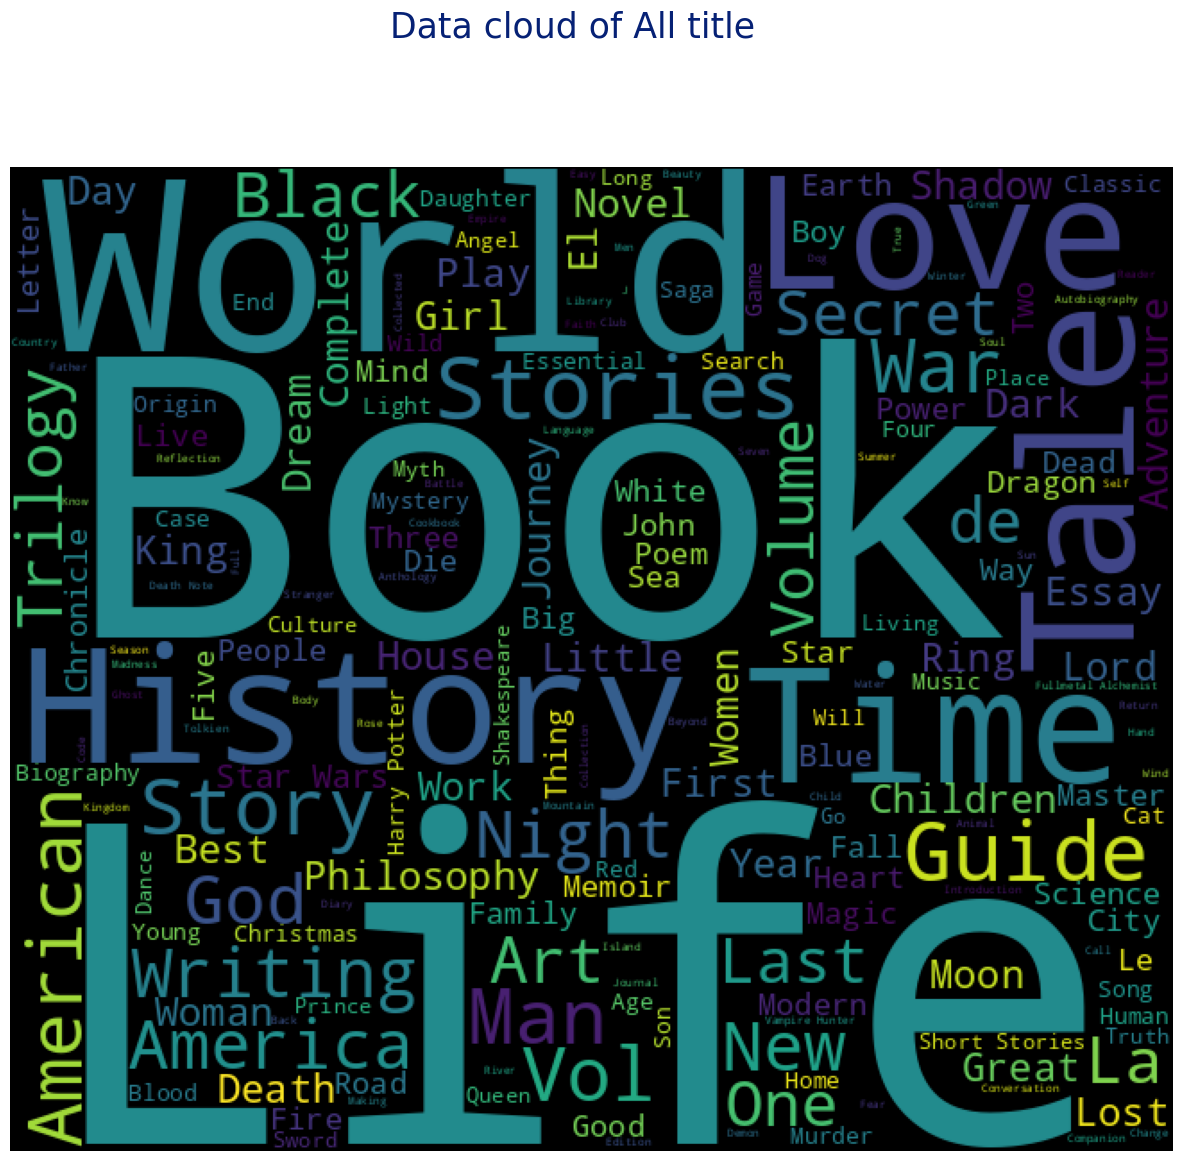

In [74]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='#000',
                          width=650,
                          height=550,
                          stopwords=STOPWORDS,
                         ).generate(" ".join(title_value))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.figtext(.5,.91,'Data cloud of All title', color='#062175', fontsize=25, ha='center')
plt.show()

For Recommendation taking too much knowledge from this notebook. [https://www.kaggle.com/hoshi7/goodreads-analysis-and-recommending-books](https://www.kaggle.com/hoshi7/goodreads-analysis-and-recommending-books)

# Recommendation Engine

In [75]:
len(new_data.only_author.unique())

4215

## create new feature

In [76]:
new_data.loc[ (new_data['average_rating'] >= 0) & (new_data['average_rating'] <= 1), 'rating_between'] = "between_0_to_1"
new_data.loc[ (new_data['average_rating'] > 1) & (new_data['average_rating'] <= 2), 'rating_between'] = "between_1_to_2"
new_data.loc[ (new_data['average_rating'] > 2) & (new_data['average_rating'] <= 3), 'rating_between'] = "between_2_to_3"
new_data.loc[ (new_data['average_rating'] > 3) & (new_data['average_rating'] <= 4), 'rating_between'] = "between_3_to_4"
new_data.loc[ (new_data['average_rating'] > 4) & (new_data['average_rating'] <= 5), 'rating_between'] = "between_4_to_5"

In [77]:
new_data.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,only_author,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,J.K. Rowling,between_4_to_5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,J.K. Rowling,between_4_to_5


In [78]:
trial = new_data[['average_rating', 'ratings_count']]
data_model = np.asarray([np.asarray(trial['average_rating']), np.asarray(trial['ratings_count'])]).T
data_model

array([[4.570000e+00, 2.095690e+06],
       [4.490000e+00, 2.153167e+06],
       [4.420000e+00, 6.333000e+03],
       ...,
       [3.960000e+00, 8.200000e+02],
       [3.720000e+00, 7.690000e+02],
       [3.910000e+00, 1.130000e+02]])

In [79]:
from sklearn.cluster import KMeans

In [80]:
# Elbow Method

score = []
x = data_model
for cluster in range(1,41):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=40)
    kmeans.fit(x)
    score.append(kmeans.inertia_)

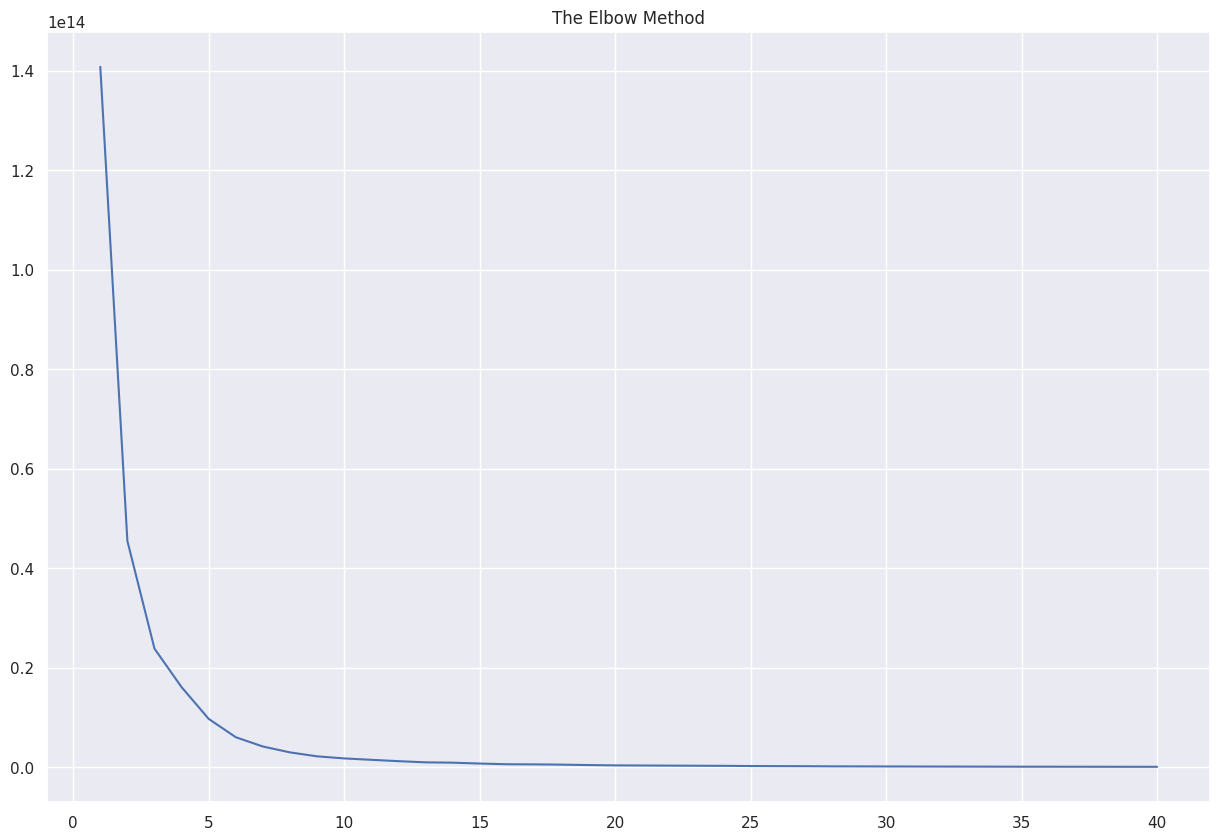

In [81]:
# plotting the score
plt.figure(figsize=(15, 10))
plt.plot(range(1,41), score)
plt.title('The Elbow Method')
# plt.xlabel('no of clusters')
# plt.ylabel('wcss')
plt.show()

In [82]:
rating_between_df = new_data['rating_between'].str.get_dummies(sep=",")
rating_between_df.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,between_4_to_5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [83]:
lang_df = new_data['language_code'].str.get_dummies(sep=",")
lang_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
engine_features = pd.concat([rating_between_df, lang_df, new_data['average_rating'], new_data['ratings_count']], axis=1)
engine_features.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,between_4_to_5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
min_max_scaler = MinMaxScaler()
engine_features = min_max_scaler.fit_transform(engine_features)

In [87]:
from sklearn import neighbors

In [88]:
engine_model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')

In [89]:
engine_model.fit(engine_features)

NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

In [90]:
dist, idlist = engine_model.kneighbors(engine_features)

In [91]:
def book_recommendation_engine(book_name):
    book_list_name = []
    book_id = new_data[new_data['title'] == book_name].index
    book_id = book_id[0]
#     print('book_id', book_id)
    for newid in idlist[book_id]:
#         print(newid)
        book_list_name.append(new_data.loc[newid].title)
#         print(new_data.loc[newid].title)
    return book_list_name

In [94]:
book_list_name = book_recommendation_engine('The Alchemist')
book_list_name

['The Alchemist',
 'The Main',
 'Scales of the Serpent (Diablo: The Sin War  #2)',
 'The Siren Song (Pirates of the Caribbean: Jack Sparrow  #2)',
 'Hollywood Tough (Shane Scully  #3)',
 'The Sound and the Fury: An Authoritative Text  Backgrounds and Contexts  Criticism']

#### Not too much but happy with this answer. I think we need book category to make it better. Try it yourself and let me know if you found the book of your choice.